PART:1
DOMAIN: Healthcare
• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. 
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by 
the client by providing different datasets to the AI team for developing a AIML model which can predict the 
condition of the patient depending on the received test results. 
• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current 
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and 
orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle 
4. S_slope
5. P_radius 
6. S_degree
7. Class

• PROJECT OBJECTIVE: Demonstrate the ability to fetch, process and leverage data to generate useful predictions 
by training Supervised Learning algorithms.
Steps 
1. Import and warehouse data:
• Import all the given datasets and explore shape and size of each.
• Merge all datasets onto one and explore final shape and size.
2. Data cleansing:
• Explore and if required correct the datatypes of each attribute
• Explore for null values in the attributes and if required drop or impute values.
3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each 
analysis. 
4. Data pre-processing:
• Segregate predictors vs target attributes
• Perform normalisation or scaling if required.
• Check for target balancing. Add your comments.
• Perform train-test split.
5. Model training, testing and tuning:
• Design and train a KNN classifier.
• Display the classification accuracies for train and test data.
• Display and explain the classification report in detail.
• Automate the task of finding best values of K for KNN.
• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained 
model with your comments for selecting this model. 
6. Conclusion and improvisation:
• Write your conclusion on the results.
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points 
collected by the research team to perform a better data analysis in future.

In [1]:
#Import Libraries
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
#import 'Normal.csv'
data1 = pd.read_csv('Part1 -Normal.csv')

In [3]:
data1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
data1.shape

(100, 7)

In [5]:
data1.size

700

In [6]:
# import 'Type_H'
data2 = pd.read_csv('Part1 -Type_H.csv')
data2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [7]:
data2.shape

(60, 7)

In [8]:
data2.size

420

In [9]:
# import 'Type_S'
data3 = pd.read_csv('Part1 -Type_S.csv')
data3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [10]:
data3.shape

(150, 7)

In [11]:
data3.size

1050

In [12]:
# import merge values data1,data2
file1 = pd.merge(data1, data2, how='outer')

In [13]:
file1.shape

(160, 7)

In [14]:
file1.head

<bound method NDFrame.head of      P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875  7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646  2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682  4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910   
..           ...        ...        ...        ...         ...       ...   
155    47.657730  13.277385  36.679985  34.380345   98.249781  6.273012   
156    43.349606   7.467469  28.065483  35.882137  112.776187  5.753277   
157    46.855781  15.351514  38.000000  31.504267  116.250917  1.662706   
158    43.203185  19.663146  35.000000  23.540039  124.846109 -2.919076   
159    48.109236  14.930725  35.564683  33.178512  124.056452  7.947905   

      Class  
0    Normal  
1    Normal  
2    Normal  
3    Normal  

In [15]:
# import the merge values of file1, data3
file2 = pd.merge(file1, data3, how='outer')

In [16]:
file2.head

<bound method NDFrame.head of      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910   
..           ...        ...        ...        ...         ...         ...   
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    Normal  
1    Normal  
2  

In [17]:
file2.shape

(310, 7)

In [18]:
file2.size

2170

In [19]:
file2["Class"].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [20]:
file2["Class"] = file2["Class"].str.replace(r"Nrmal","Normal")
file2["Class"] = file2["Class"].str.replace(r"tp_s","Type_S")
file2["Class"] = file2["Class"].str.replace(r"type_h","Type_H")
file2["Class"].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

# Data cleansing


In [21]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {file2.shape}")
totalrows=file2.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (310, 7)
 Total number of rows in the dataset =  310


In [22]:
# Checking Null colunms
file_nullcols = file2.isnull().sum()
file_nullcols

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [23]:
# Checking data type of each colunm to check if any type needs to be changed
file2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [24]:
file2.mean()

P_incidence     60.496653
P_tilt          17.542822
L_angle         51.930930
S_slope         42.953831
P_radius       117.920655
S_Degree        26.296694
dtype: float64

In [25]:
# Checking basic details of the data
file2.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [26]:
file2.dtypes.value_counts()

float64    6
object     1
dtype: int64

# EDA

# Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

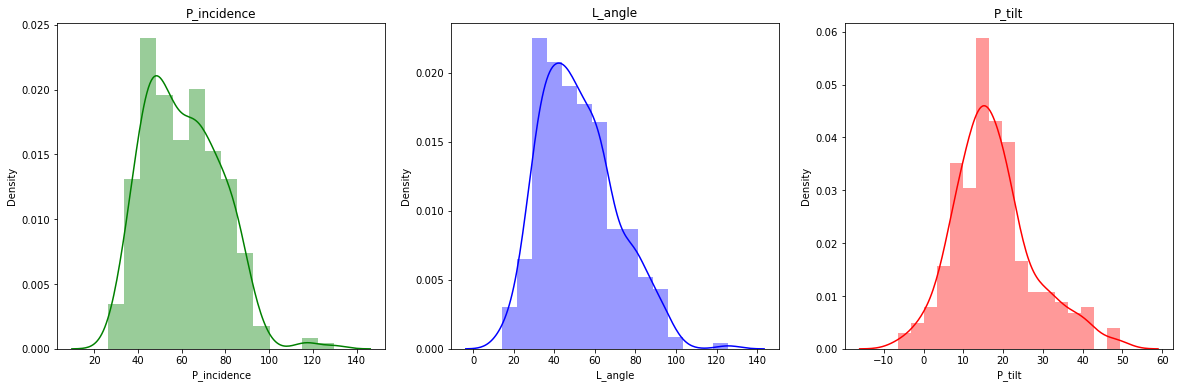

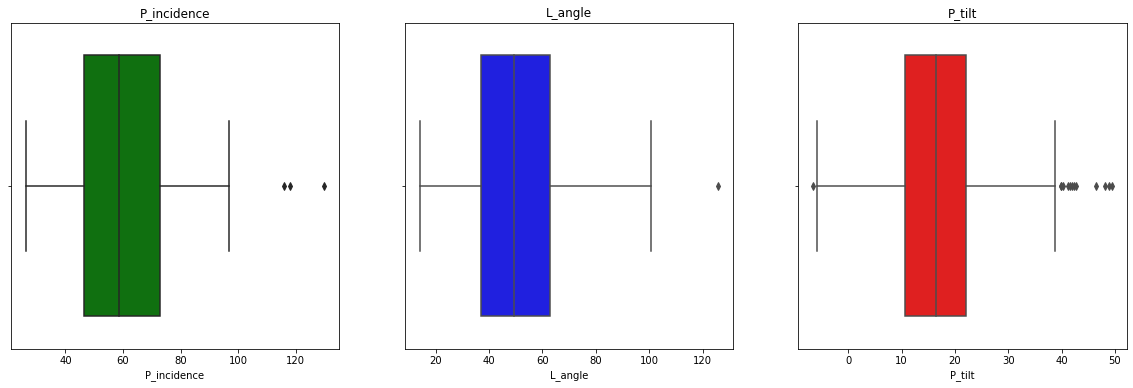

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.distplot(file2['P_incidence'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('L_angle')
sns.distplot(file2['L_angle'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('P_tilt')
sns.distplot(file2['P_tilt'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.boxplot(file2['P_incidence'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('L_angle')
sns.boxplot(file2['L_angle'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('P_tilt')
sns.boxplot(file2['P_tilt'],orient='vertical',color='red')


plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

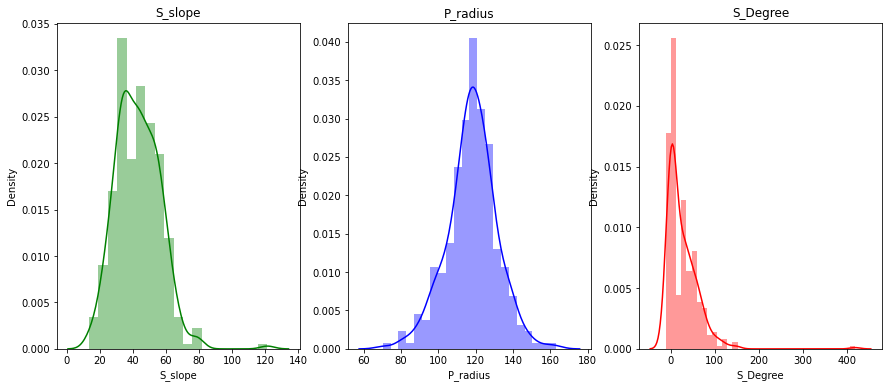

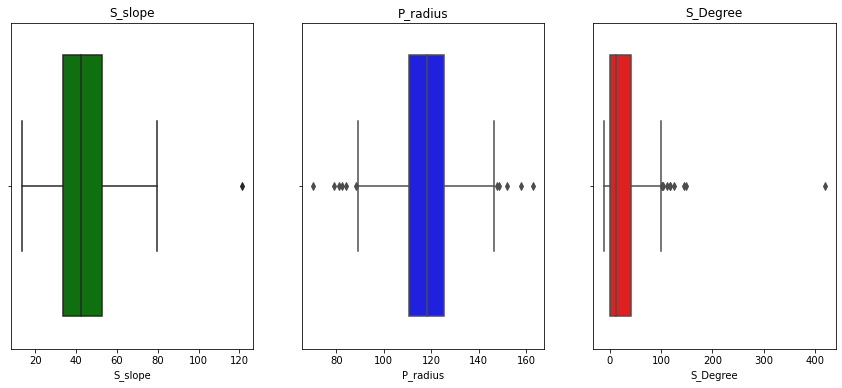

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('S_slope')
sns.distplot(file2['S_slope'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('P_radius')
sns.distplot(file2['P_radius'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('S_Degree')
sns.distplot(file2['S_Degree'],color='red')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('S_slope')
sns.boxplot(file2['S_slope'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('P_radius')
sns.boxplot(file2['P_radius'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('S_Degree')
sns.boxplot(file2['S_Degree'],orient='vertical',color='red')



plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


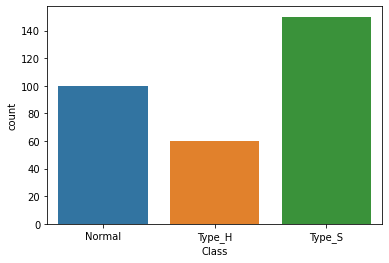

In [29]:
sns.countplot(file2['Class']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


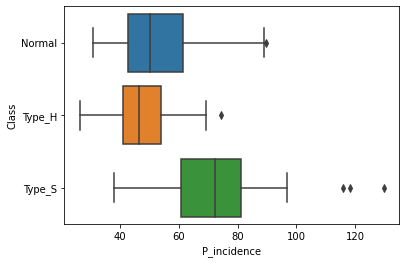

In [30]:
sns.boxplot(file2['P_incidence'],file2['Class']);

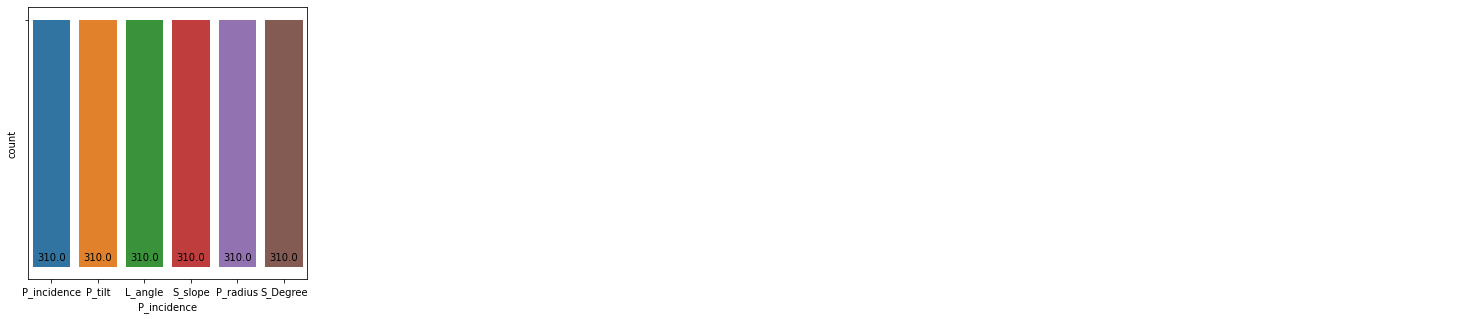

In [31]:
plt.figure(figsize=(5,5))
splot=sns.barplot(x='P_incidence',data=file2)
ax=sns.countplot(data = file2)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),(p.get_x()+p.get_width() / 2.,p.get_height()), ha= 'center' , va= 'center', xytext = (0,9),textcoords = 'offset points')

# BIVARIATE

In [32]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10,10))
corr = file2.corr()
corr.style

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [33]:
corr.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
dtype: object

<AxesSubplot:xlabel='P_radius', ylabel='P_incidence'>

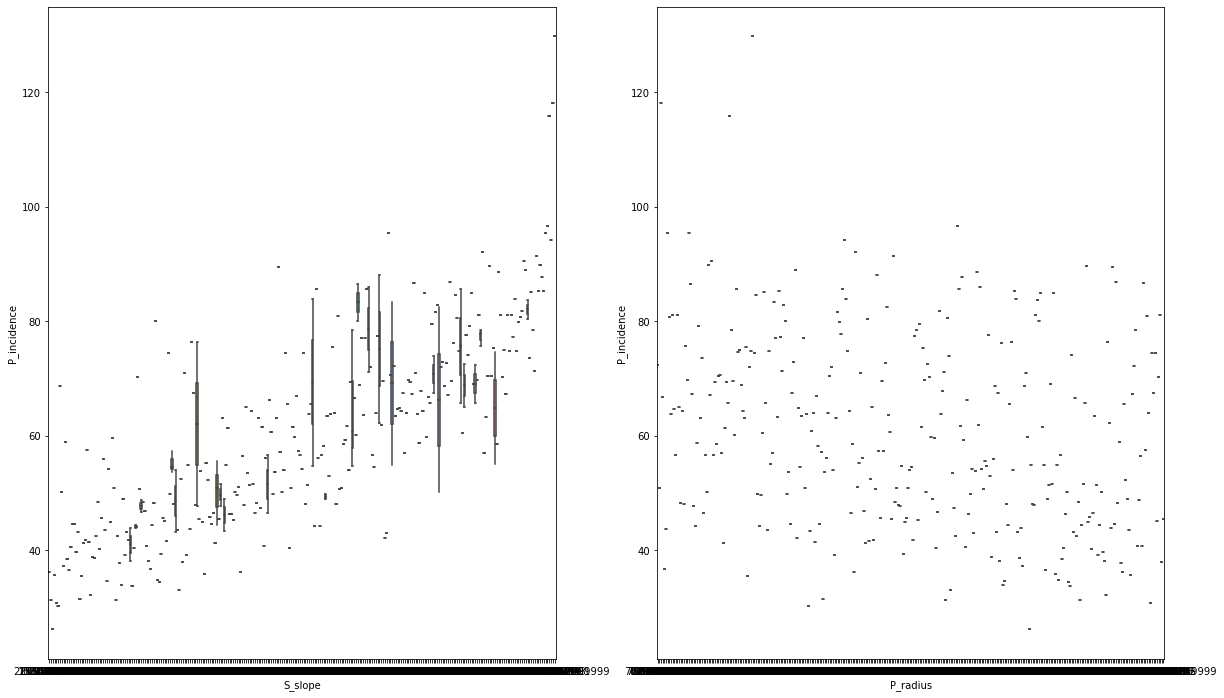

In [34]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x = 'S_slope', y = 'P_incidence', data = file2)
plt.subplot(1,2,2)
sns.boxplot(x = 'P_radius', y = 'P_incidence', data = file2)

<AxesSubplot:xlabel='L_angle', ylabel='S_Degree'>

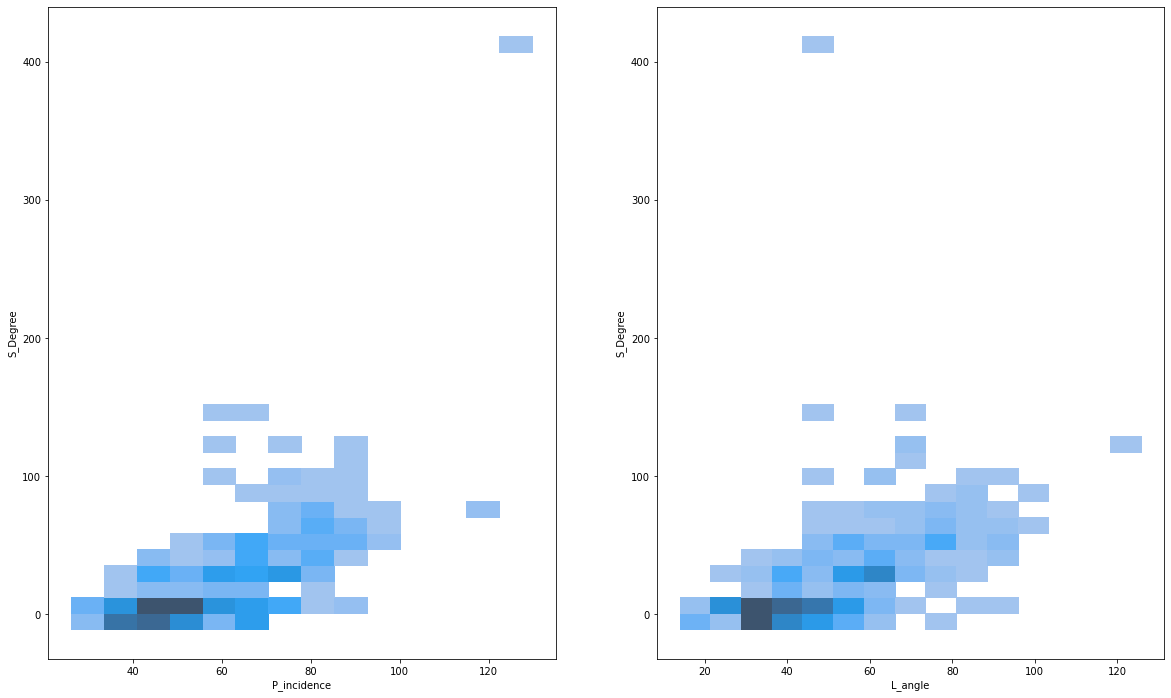

In [35]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.histplot(x = 'P_incidence', y = 'S_Degree', data = file2)
plt.subplot(1,2,2)
sns.histplot(x = 'L_angle', y = 'S_Degree', data = file2)

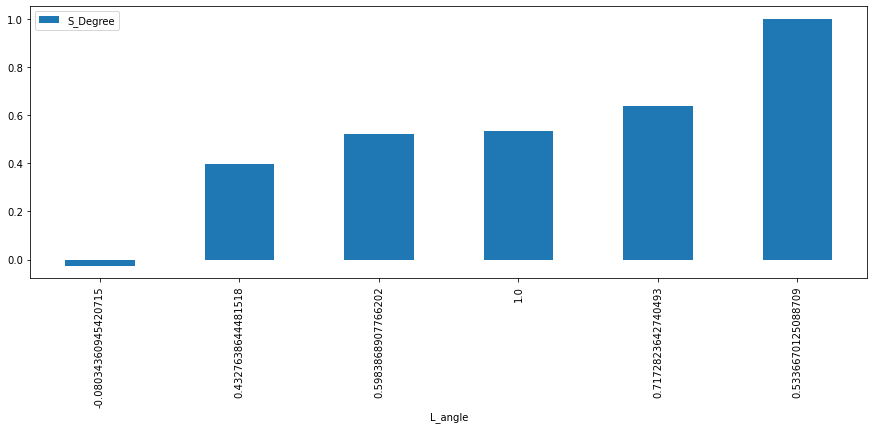

In [36]:
corr.groupby(by=['L_angle'])['S_Degree'].sum().reset_index().sort_values(['S_Degree']).tail(10).plot(x='L_angle',
                                                                                                           y='S_Degree',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

#  Multivariate 

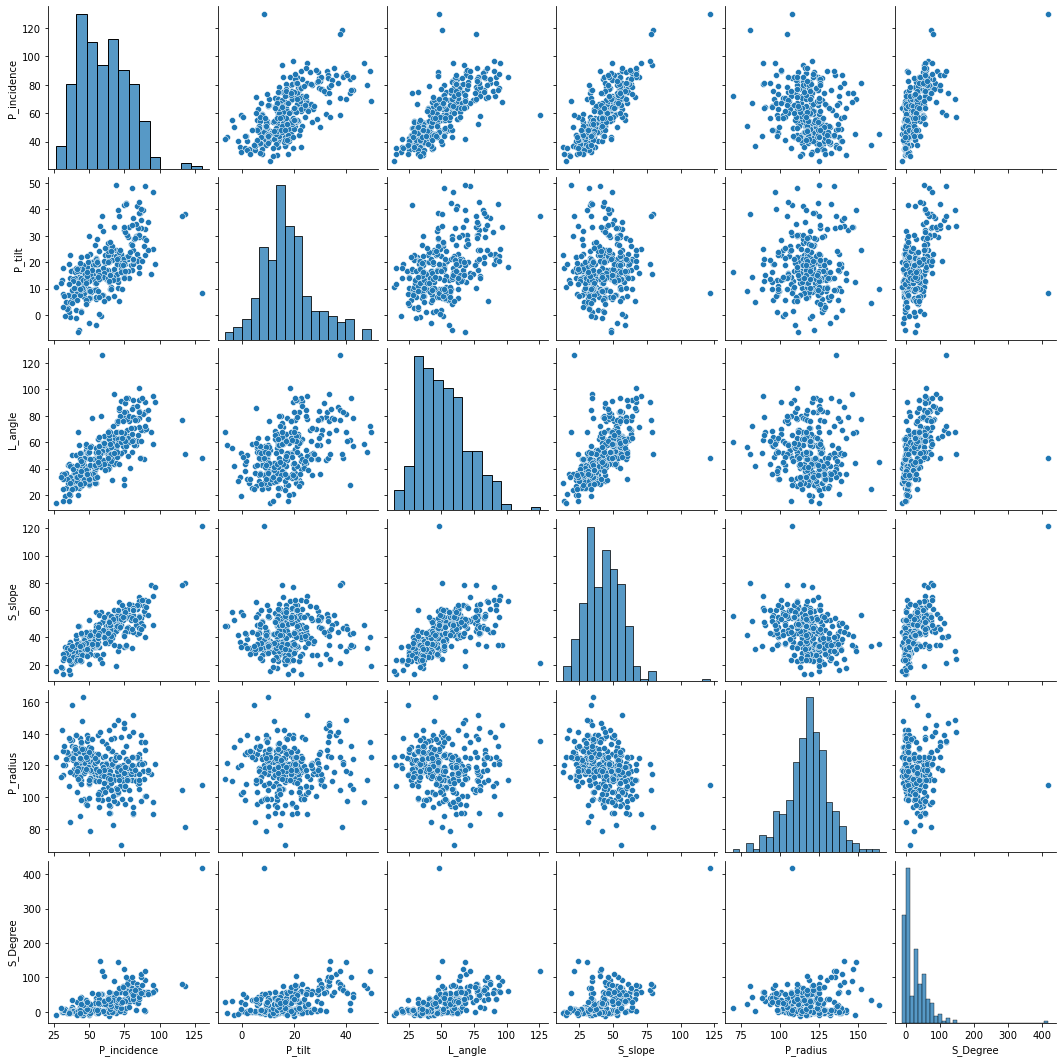

In [37]:
sns.pairplot(file2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P_incidence', ylabel='L_angle'>

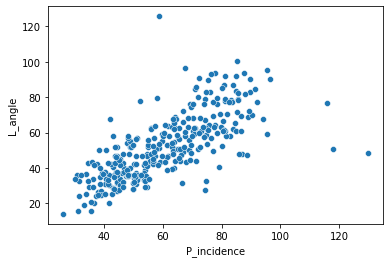

In [38]:
sns.scatterplot(file2['P_incidence'], file2['L_angle'])  # Plots the scatter plot using two variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


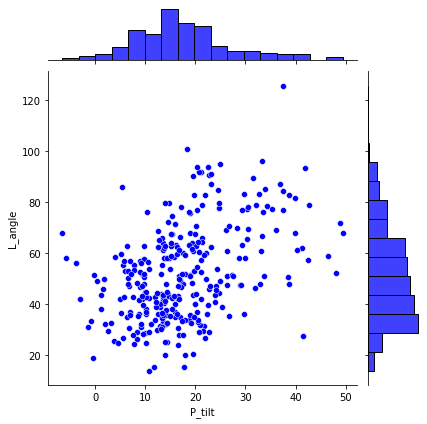

In [39]:
sns.jointplot(file2['P_tilt'],file2['L_angle'],color='blue');

<AxesSubplot:>

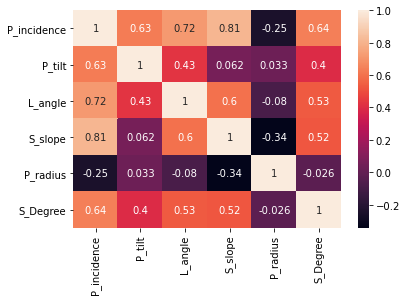

In [40]:
sns.heatmap(file2.corr(), annot=True)  # plot the correlation coefficients as a heatmap

In [41]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = file2.drop(labels= "Class" , axis = 1)
y = file2["Class"]
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [42]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,8.702716e-17,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.326096e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,5.121351e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-6.274551e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-8.156558e-17,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


# Splitting data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

# Build kNN Model

In [44]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [45]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

# Evaluate Performance of kNN Model

In [46]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7526881720430108

Confusion Matrix


<AxesSubplot:>

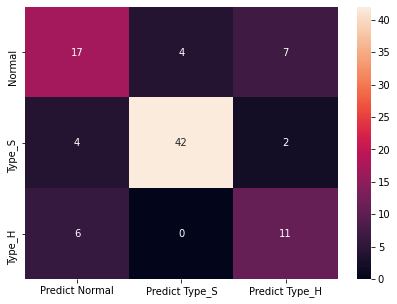

In [47]:
 # calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Type_S", "Type_H"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_S", "Type_H"]],
                  columns = [i for i in ["Predict Normal","Predict Type_S", "Predict Type_H"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

 Choosing the K-Value

 Choosing the right k is not easy and is subjective. Usually choose as an odd number is choosen.

 A small k captures too much training noise and hence does not do well in test data. A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.

If the number of classes is 2, many suggest a rule of thumb approach(set k=sqrt(n)), that might not be the best but does well mostly.

In [48]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

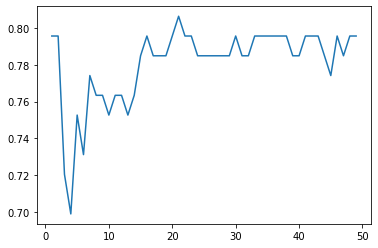

In [49]:
plt.plot(range(1,50),scores)

# conclusion

#The accuracy of knn model is 75%

PART:2
DOMAIN: Banking and finance
• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee 
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the 
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an 
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing 
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit 
with same budget as per last campaign. 
• DATA DESCRIPTION: The data consists of the following attributes: 
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.
• PROJECT OBJECTIVE: Build an AIML model to perform focused marketing by predicting the potential customers who will 
convert using the historical dataset.
 Steps and tasks: [ Total Score: 30 points ]
1. Import and warehouse data:
• Import all the given datasets and explore shape and size of each.
• Merge all datasets onto one and explore final shape and size.
2. Data cleansing:
• Explore and if required correct the datatypes of each attribute
• Explore for null values in the attributes and if required drop or impute values.
3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
4. Data pre-processing:
• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced.
• Perform train-test split.
5. Model training, testing and tuning:
• Design and train a Logistic regression and Naive Bayes classifiers.
• Display the classification accuracies for train and test data.
• Display and explain the classification report in detail.
• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with 
your comments for selecting this model. 
6. Conclusion and improvisation:
• Write your conclusion on the results.
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the 
bank to perform a better data analysis in future

In [50]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
#imjport thew file data
data1 = pd.read_csv('Part2 -Data1.csv')

In [52]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [53]:
data1.shape

(5000, 8)

In [54]:
data1.size

40000

In [55]:
#import the file data2
data2 = pd.read_csv('Part2 -Data2.csv')

In [56]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [57]:
data2.shape

(5000, 7)

In [58]:
data2.size

35000

In [59]:
#merge the value of data1& data2
file = pd.merge(data1, data2, how='outer')

In [60]:
file.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [61]:
file.shape

(5000, 14)

In [62]:
file.size

70000

In [63]:
file.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


# Data cleansing

In [64]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {file.shape}")
totalrows=file.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (5000, 14)
 Total number of rows in the dataset =  5000


In [65]:
# Checking Null colunms
file_nullcols = file.isnull().sum()
file_nullcols


ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [66]:
# Checking data type of each colunm to check if any type needs to be changed
file.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [67]:
# Checking basic details of the data
file.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [68]:
file.dtypes.value_counts()

int64      12
float64     2
dtype: int64

In [69]:
file.mean()

ID                      2500.500000
Age                       45.338400
CustomerSince             20.104600
HighestSpend              73.774200
ZipCode                93152.503000
HiddenScore                2.396400
MonthlyAverageSpend        1.937938
Level                      1.881000
Mortgage                  56.498800
Security                   0.104400
FixedDepositAccount        0.060400
InternetBanking            0.596800
CreditCard                 0.294000
LoanOnCard                 0.096386
dtype: float64

In [70]:
file.drop(['ID','ZipCode'],axis=1,inplace=True)

# EDA

# Univariate Analysis

(array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [ 406.,  765.,  826., ...,    0.,    0.,    0.],
        [   0.,   49.,  176., ...,    0.,    0.,    0.],
        ...,
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        [4980.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([ -3.  ,   3.38,   9.76,  16.14,  22.52,  28.9 ,  35.28,  41.66,
         48.04,  54.42,  60.8 ,  67.18,  73.56,  79.94,  86.32,  92.7 ,
         99.08, 105.46, 111.84, 118.22, 124.6 , 130.98, 137.36, 143.74,
        150.12, 156.5 , 162.88, 169.26, 175.64, 182.02, 188.4 , 194.78,
        201.16, 207.54, 213.92, 220.3 , 226.68, 233.06, 239.44, 245.82,
        252.2 , 258.58, 264.96, 271.34, 277.72, 284.1 , 290.48, 296.86,
        303.24, 309.62, 316.  , 322.38, 328.76, 335.14, 341.52, 347.9 ,
        354.28, 360.66, 367.04, 373.42, 379.8 , 386.18, 392.56, 398.94,
        405.32, 411.7 , 418.08, 424.46, 430.84, 437.22, 443.6 , 449

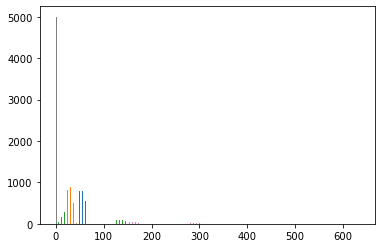

In [71]:
# The following code plots a histrogram using the matplotlib package.
# The bins argument creates class intervals. In this case we are creating 50 such intervals
plt.hist(file, bins=100)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

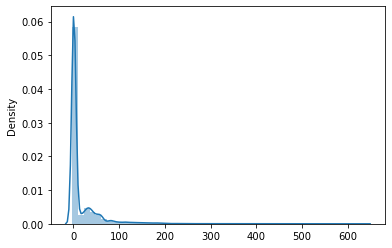

In [72]:
sns.distplot(file) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

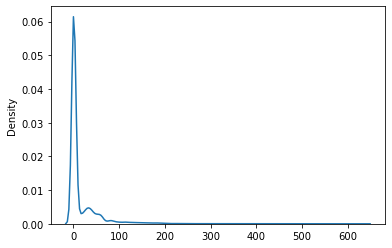

In [73]:
sns.distplot(file, hist=False) # adding an argument to plot only frequency polygon

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

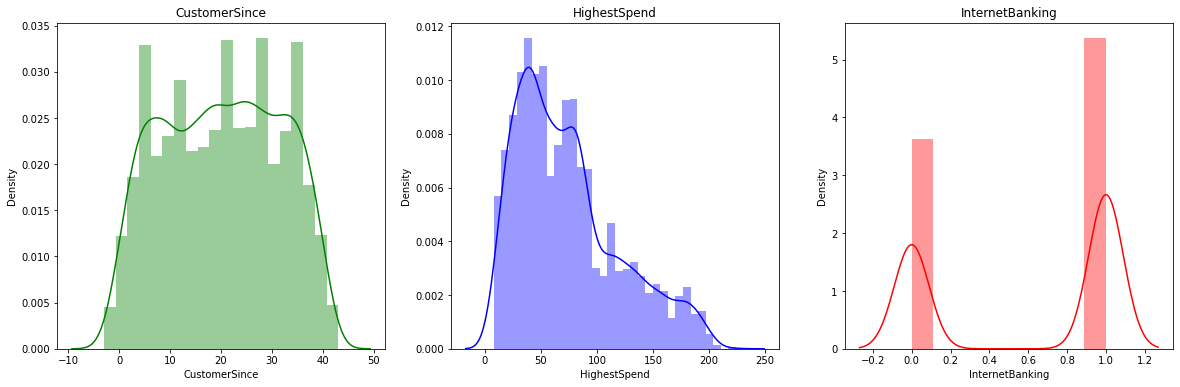

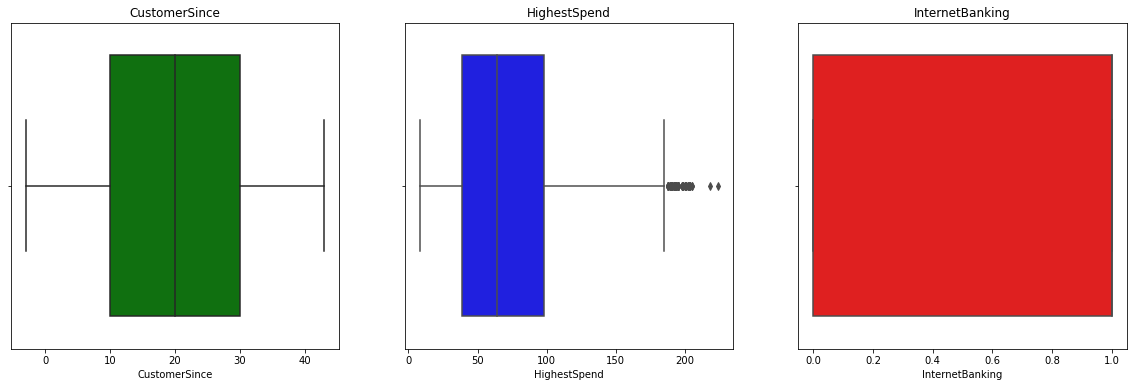

In [74]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('CustomerSince')
sns.distplot(file['CustomerSince'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('HighestSpend')
sns.distplot(file['HighestSpend'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('InternetBanking')
sns.distplot(file['InternetBanking'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('CustomerSince')
sns.boxplot(file['CustomerSince'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('HighestSpend')
sns.boxplot(file['HighestSpend'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('InternetBanking')
sns.boxplot(file['InternetBanking'],orient='vertical',color='red')


plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

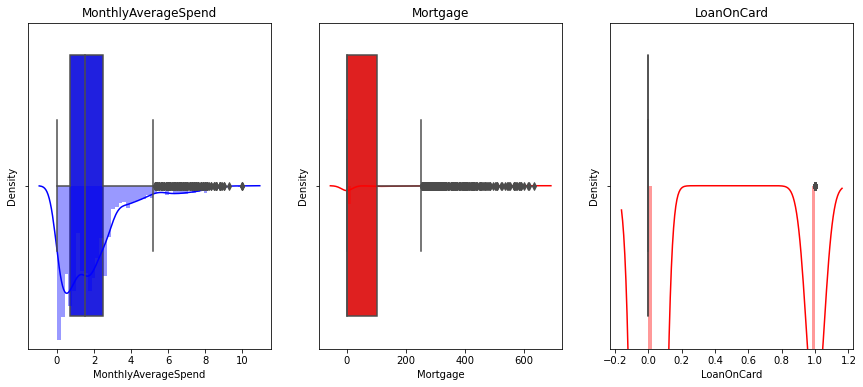

In [75]:
plt.figure(figsize=(20,6))

# subplot 1
plt.subplot(1, 4, 2)
plt.title('MonthlyAverageSpend')
sns.distplot(file['MonthlyAverageSpend'],color='blue')

# subplot 2
plt.subplot(1, 4, 3)
plt.title('Mortgage')
sns.distplot(file['Mortgage'],color='red')

# subplot 3
plt.subplot(1, 4, 4)
plt.title('LoanOnCard')
sns.distplot(file['LoanOnCard'],color='red')



# subplot 1
plt.subplot(1, 4, 2)
plt.title('MonthlyAverageSpend')
sns.boxplot(file['MonthlyAverageSpend'],orient='vertical',color='blue')

# subplot 2
plt.subplot(1, 4, 3)
plt.title('Mortgage')
sns.boxplot(file['Mortgage'],orient='vertical',color='red')

# subplot 3
plt.subplot(1, 4, 4)
plt.title('LoanOnCard')
sns.boxplot(file['LoanOnCard'],orient='vertical',color='red')



plt.show()

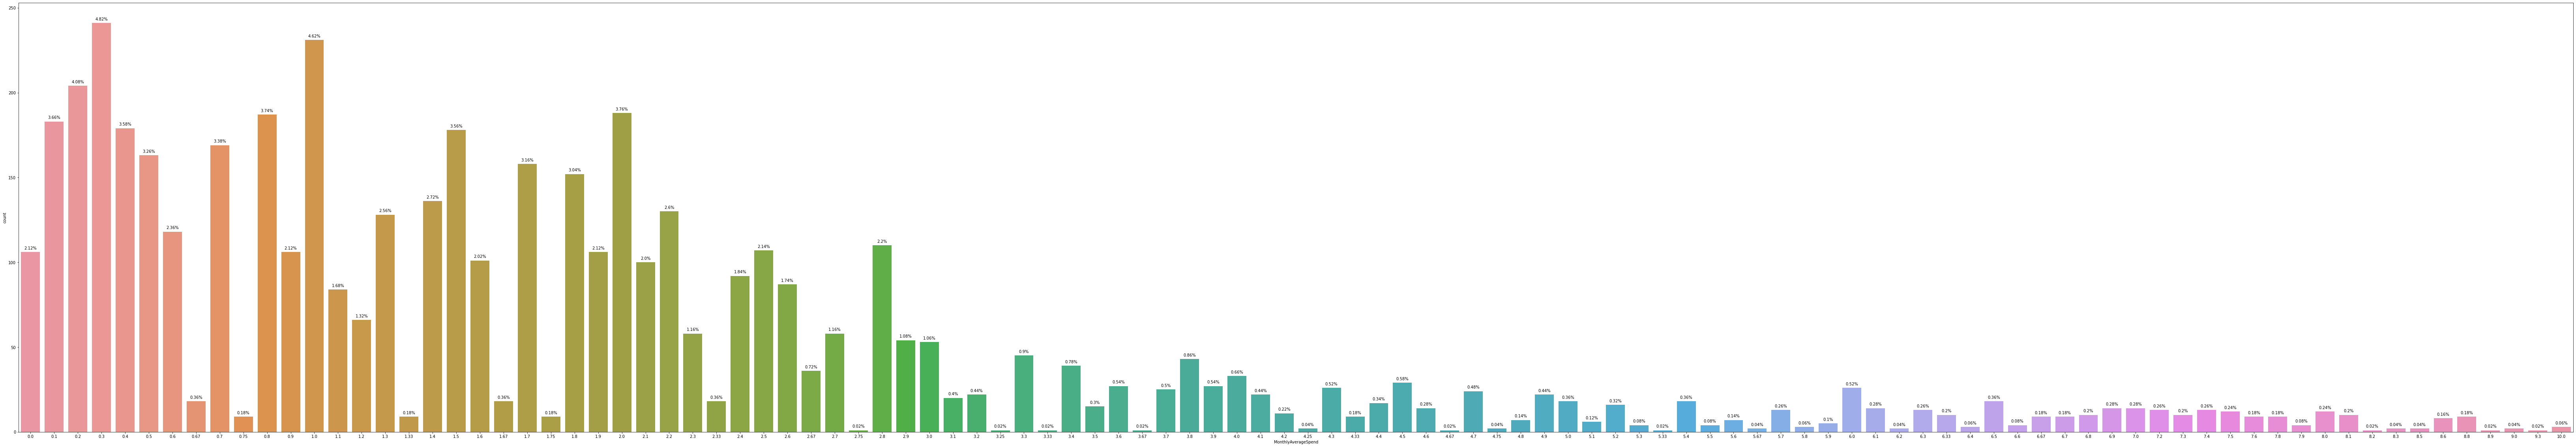

In [76]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(file['MonthlyAverageSpend'].unique()) + 8
fig.set_size_inches(width , 20)
ax=sns.countplot(data = file, x= 'MonthlyAverageSpend') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(file)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

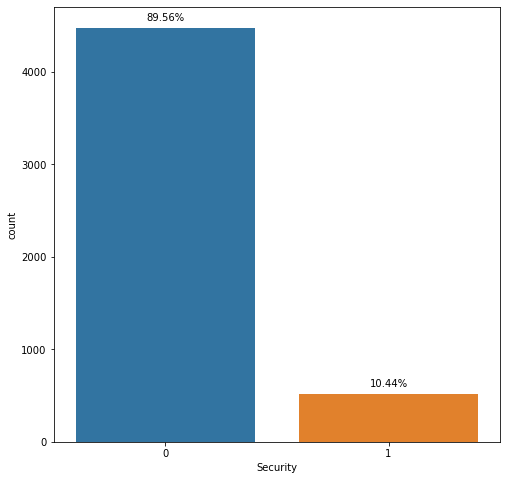

In [77]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(file['Security'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = file, x= 'Security') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(file)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Bivibrate

In [78]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = file.corr()
corr.style

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.008147
CustomerSince,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007801
HighestSpend,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502626
HiddenScore,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061761
MonthlyAverageSpend,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366912
Level,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.137010
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.141947
Security,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021982
FixedDepositAccount,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316131
InternetBanking,0.013702,0.013898,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210,0.006034


In [79]:
corr.dtypes

Age                    float64
CustomerSince          float64
HighestSpend           float64
HiddenScore            float64
MonthlyAverageSpend    float64
Level                  float64
Mortgage               float64
Security               float64
FixedDepositAccount    float64
InternetBanking        float64
CreditCard             float64
LoanOnCard             float64
dtype: object

<AxesSubplot:xlabel='HiddenScore', ylabel='CreditCard'>

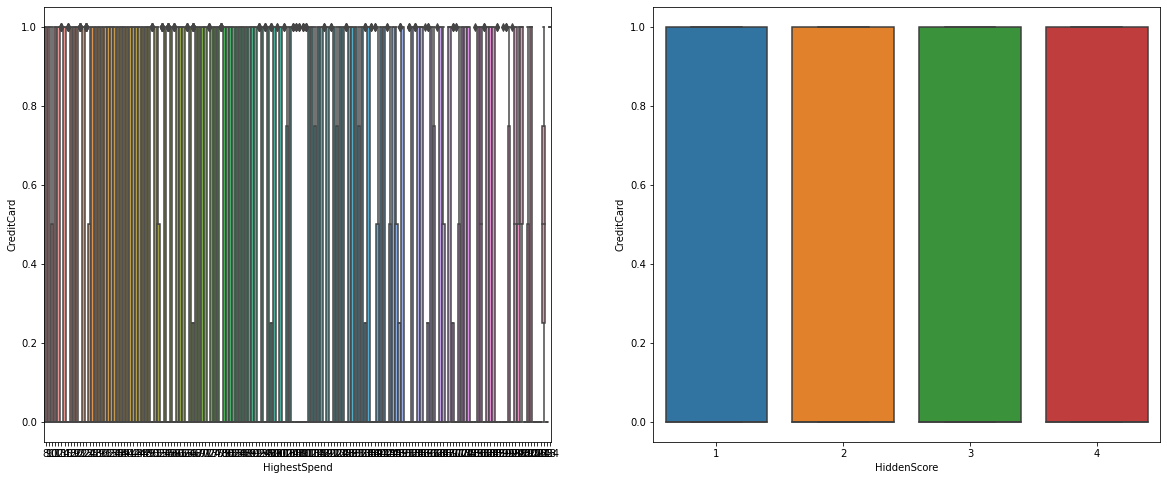

In [80]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'HighestSpend', y = 'CreditCard', data = file)
plt.subplot(1,2,2)
sns.boxplot(x = 'HiddenScore', y = 'CreditCard', data = file)

<AxesSubplot:xlabel='InternetBanking', ylabel='Mortgage'>

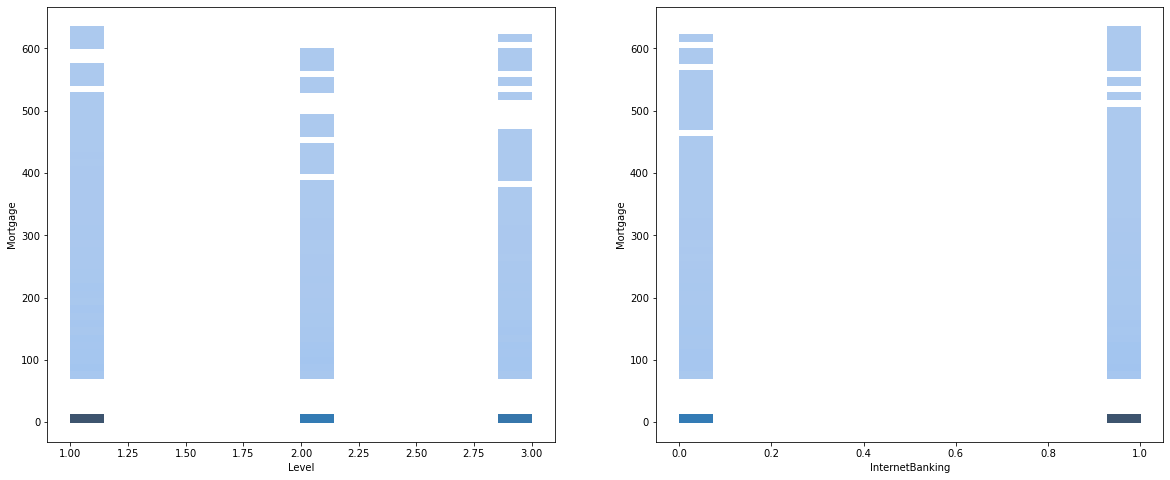

In [81]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(x = 'Level', y = 'Mortgage', data = file)
plt.subplot(1,2,2)
sns.histplot(x = 'InternetBanking', y = 'Mortgage', data = file)

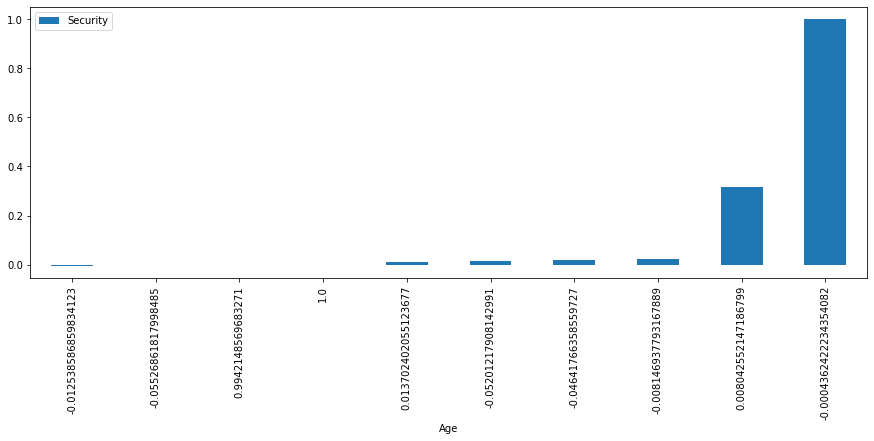

In [82]:
corr.groupby(by=['Age'])['Security'].sum().reset_index().sort_values(['Security']).tail(10).plot(x='Age',
                                                                                                           y='Security',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()


# Multivibrate

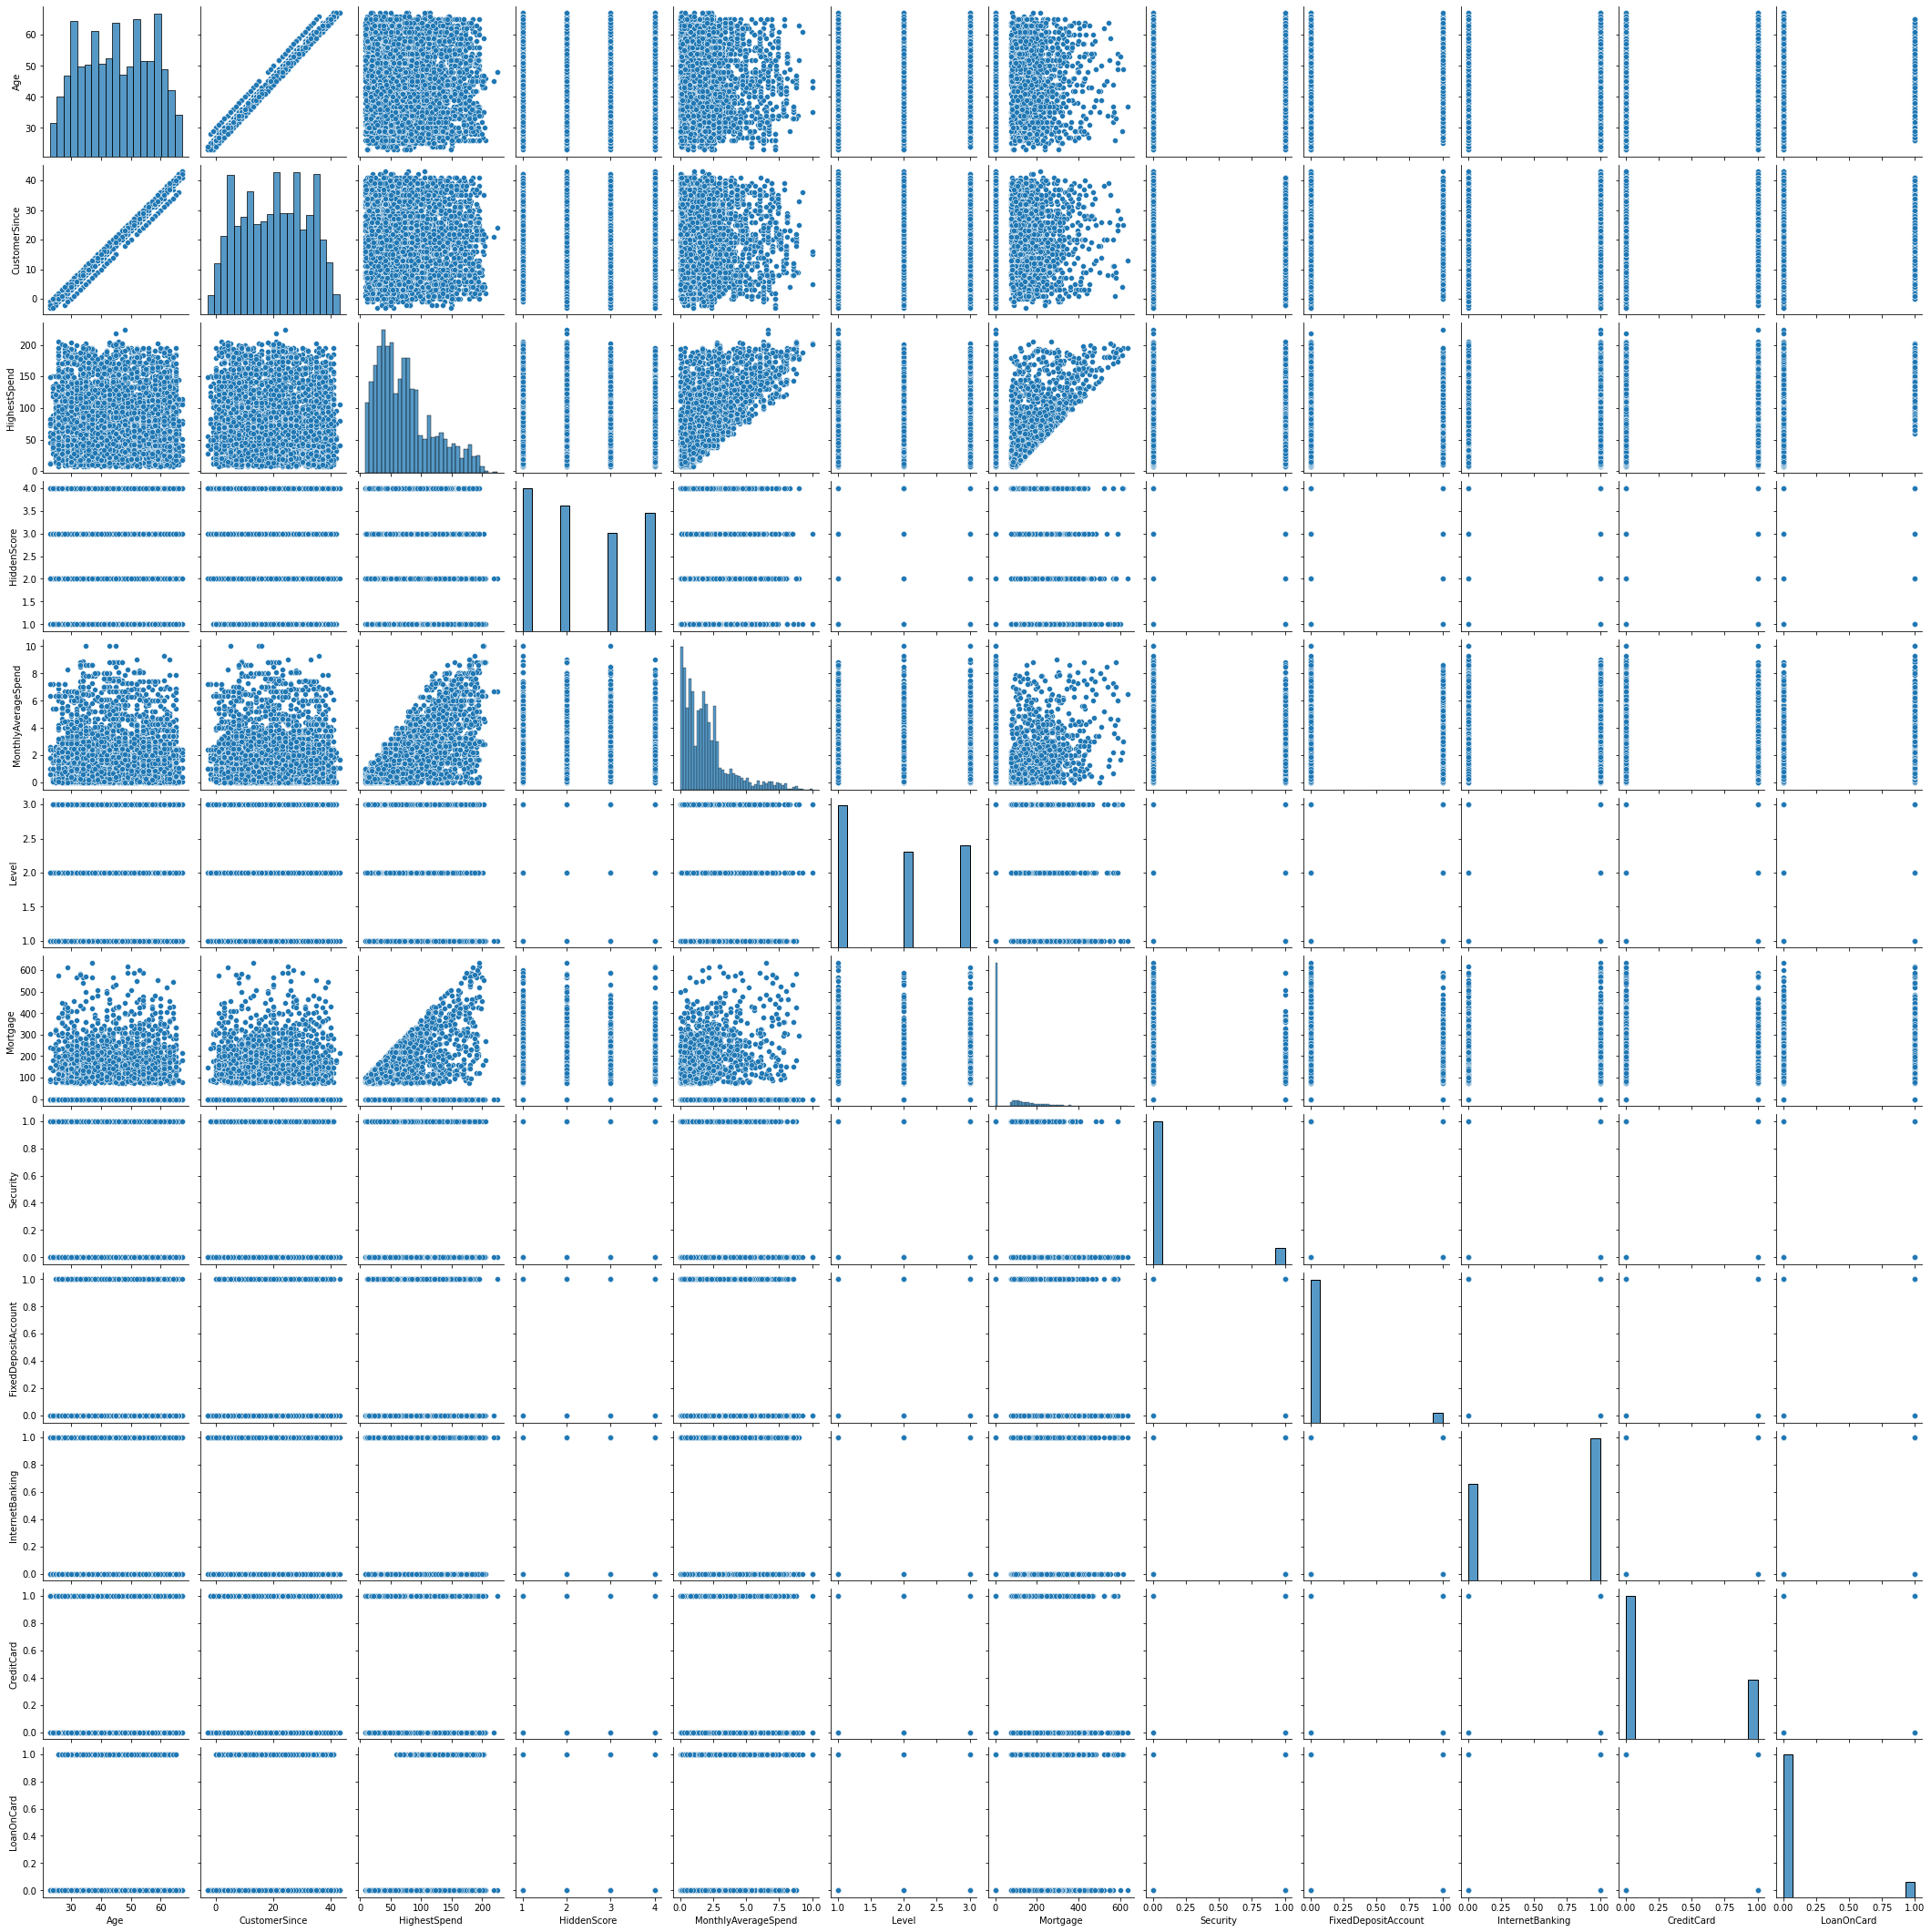

In [83]:
sns.pairplot(file)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HighestSpend', ylabel='Level'>

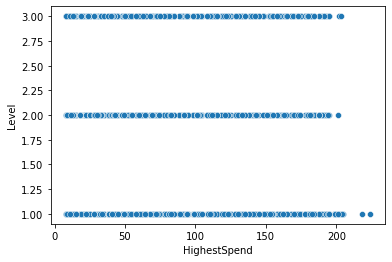

In [84]:
sns.scatterplot(file['HighestSpend'], file['Level'])  # Plots the scatter plot using two variables

<AxesSubplot:>

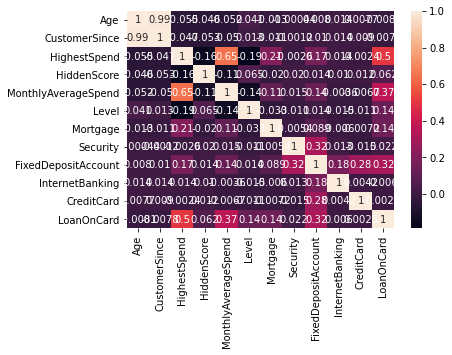

In [85]:
sns.heatmap(file.corr(), annot=True)  # plot the correlation coefficients as a heatmap

In [86]:
X = file.drop(labels= "LoanOnCard" , axis = 1)
y = file["LoanOnCard"]
X.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


# Splitting data

In [87]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
file_train, file_test = train_test_split(file, train_size = 0.7, test_size = 0.3, random_state = 70)

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()

In [90]:
# Apply scaler() to all the columns except the 'dummy' variables
vars = ['Age', 'CustomerSince', 'HiddenScore', 'HiddenScore'
            ,'InternetBanking', 'CreditCard']

file[vars] = scaler.fit_transform(file[vars])

In [91]:
file.head() # To check first 5 rows of data set

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,0.045455,0.086957,49,1.000000,1.6,1,0,1,0,0.0,0.0,NaN
1,0.500000,0.478261,34,0.666667,1.5,1,0,1,0,0.0,0.0,NaN
2,0.363636,0.391304,11,0.000000,1.0,1,0,0,0,0.0,0.0,NaN
3,0.272727,0.260870,100,0.000000,2.7,2,0,0,0,0.0,0.0,NaN
4,0.272727,0.239130,45,1.000000,1.0,2,0,0,0,0.0,1.0,NaN


In [92]:
file.isnull().values.any() # If there are any null values in data set

True

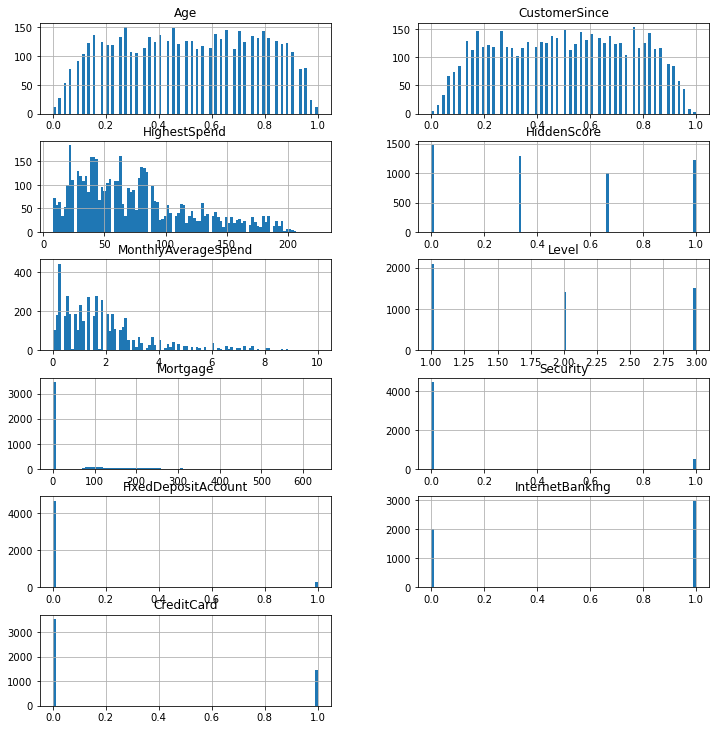

In [93]:
columns = list(file)[0:-1] # Excluding Outcome column which has only 
file[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

# Identify Correlation in data 

In [94]:
file.corr() # It will show correlation matrix

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.008147
CustomerSince,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007801
HighestSpend,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502626
HiddenScore,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061761
MonthlyAverageSpend,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366912
Level,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.137010
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.141947
Security,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021982
FixedDepositAccount,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316131
InternetBanking,0.013702,0.013898,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210,0.006034


In [95]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

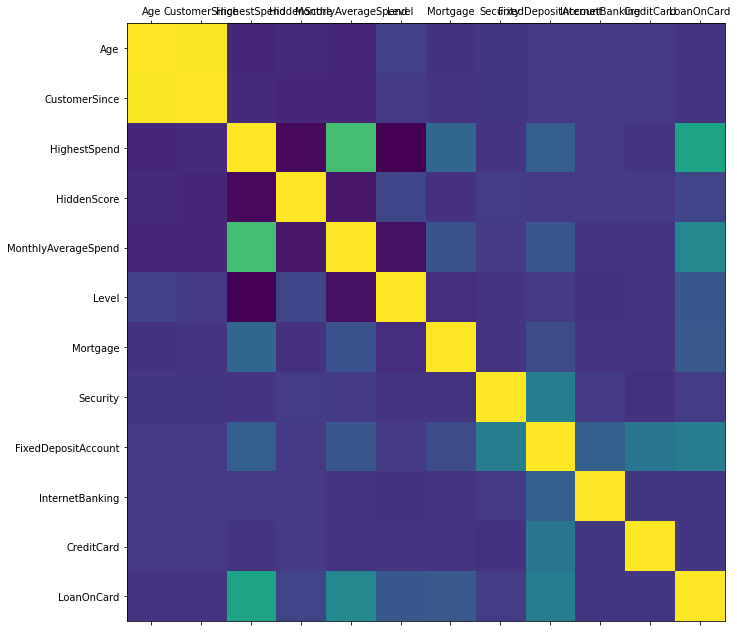

In [96]:
plot_corr(file)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

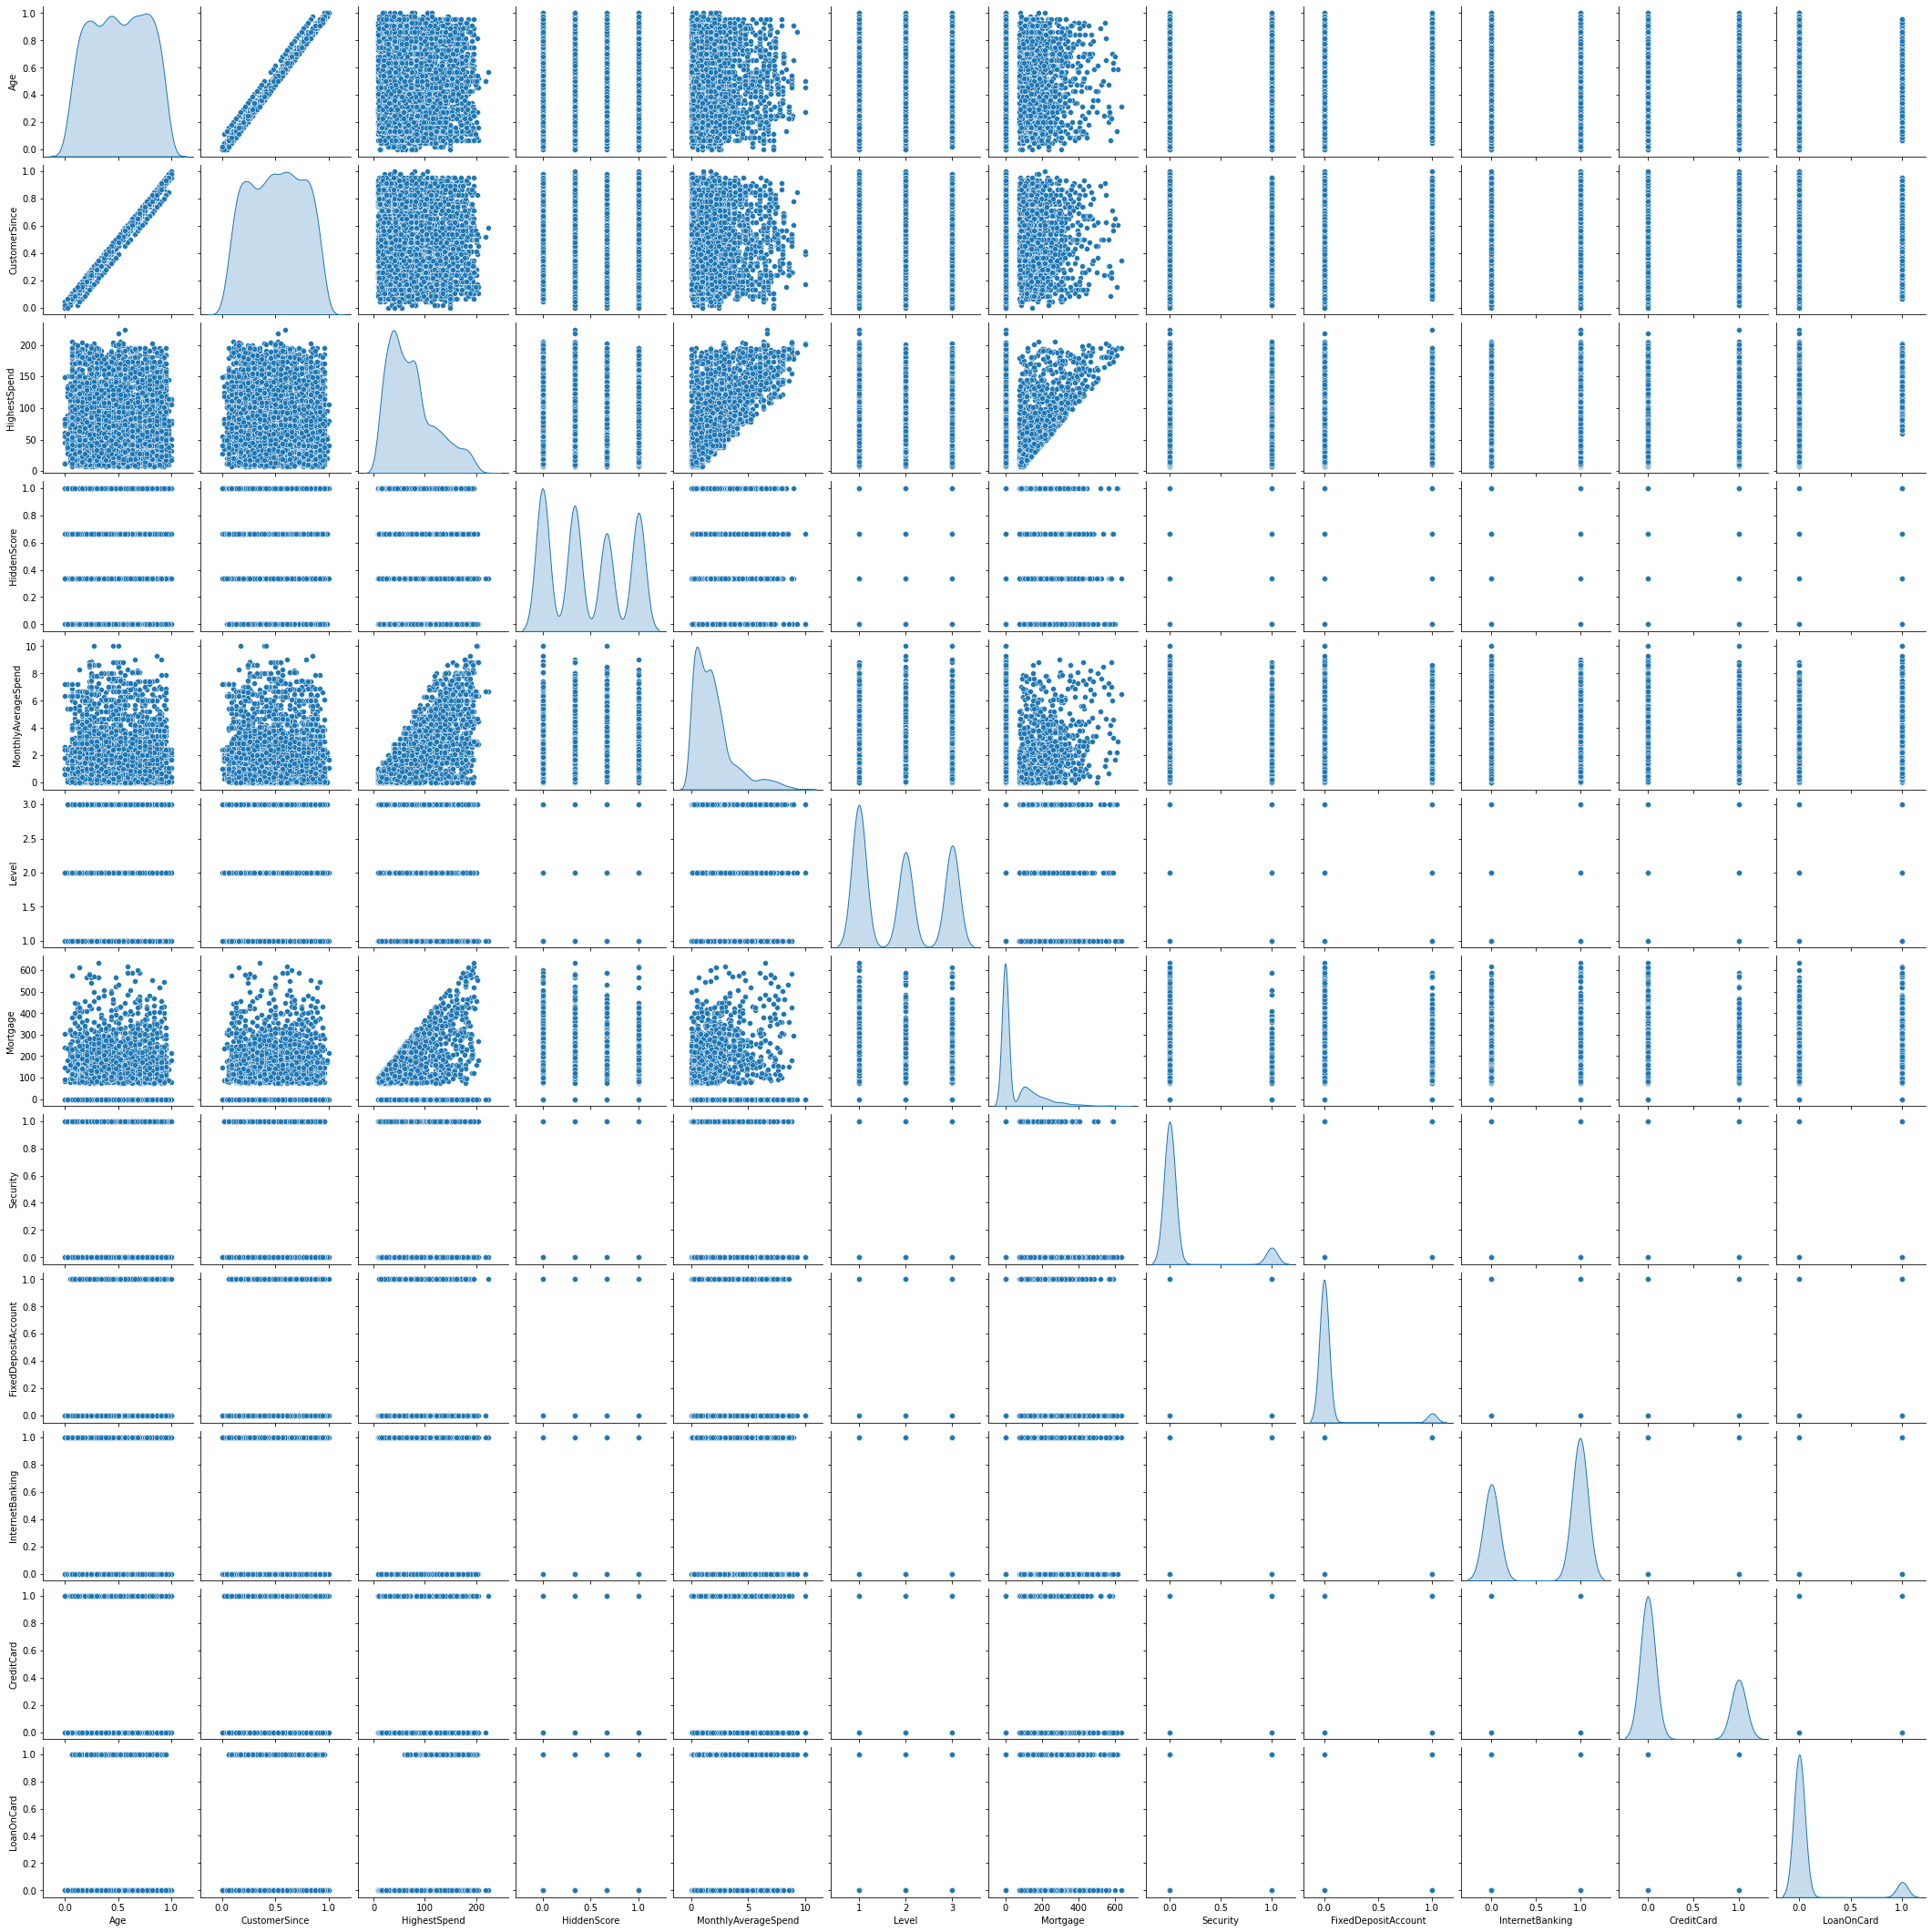

In [97]:
sns.pairplot(file,diag_kind='kde')

In [98]:
import statistics

statistics.mode(file["LoanOnCard"])

0.0

In [99]:
file['LoanOnCard']=file['LoanOnCard'].fillna(file['LoanOnCard'].mode()[0])

In [100]:
file['LoanOnCard'].value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

In [101]:
n_true = len(file.loc[file['LoanOnCard'] == True])
n_false = len(file.loc[file['LoanOnCard'] == False])
print("Number of true loancards: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false loancards: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true loancards: 480 (9.60%)
Number of false loancards: 4520 (90.40%)


# Spliting the data 

In [102]:
from sklearn.model_selection import train_test_split

X = file.drop('LoanOnCard',axis=1)     # Predictor feature columns (8 X m)

Y = file['LoanOnCard']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1334,0.545455,0.543478,35,0.333333,1.3,1,0,0,0,1.0,0.0
4768,0.340909,0.369565,39,0.000000,2.0,2,0,0,0,1.0,0.0
65,0.818182,0.826087,131,0.000000,3.8,1,0,0,0,1.0,1.0
177,0.136364,0.130435,65,1.000000,1.8,2,244,0,0,0.0,0.0
4489,0.363636,0.347826,21,0.666667,0.2,2,0,0,0,1.0,0.0


In [103]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(file.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(file.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Replace 0s with serial mean 

In [104]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,0.545455,0.543478,35.0,0.333333,1.3,1.0,181.659259,1.0,1.0,1.0,1.0
1,0.340909,0.369565,39.0,0.658441,2.0,2.0,181.659259,1.0,1.0,1.0,1.0
2,0.818182,0.826087,131.0,0.658441,3.8,1.0,181.659259,1.0,1.0,1.0,1.0
3,0.136364,0.130435,65.0,1.000000,1.8,2.0,244.000000,1.0,1.0,1.0,1.0
4,0.363636,0.347826,21.0,0.666667,0.2,2.0,181.659259,1.0,1.0,1.0,1.0


In [105]:
X = file.drop('LoanOnCard',axis=1)     

Y = file['LoanOnCard']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [106]:
x_train.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1334,0.545455,0.543478,35,0.333333,1.3,1,0,0,0,1.0,0.0
4768,0.340909,0.369565,39,0.000000,2.0,2,0,0,0,1.0,0.0
65,0.818182,0.826087,131,0.000000,3.8,1,0,0,0,1.0,1.0
177,0.136364,0.130435,65,1.000000,1.8,2,244,0,0,0.0,0.0
4489,0.363636,0.347826,21,0.666667,0.2,2,0,0,0,1.0,0.0


# Train Naive Bayes algorithm

In [107]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# created the model
file_model = GaussianNB()

file_model.fit(x_train, y_train.ravel())


GaussianNB()

# Performance of our model with training data

In [108]:
file_train_predict = file_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, file_train_predict)))
print()

Model Accuracy: 0.8900



# Lets check the confusion matrix and classification report

In [109]:
file_test_predict = file_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, file_test_predict)))
print()

Model Accuracy: 0.8747



Confusion Matrix


<AxesSubplot:>

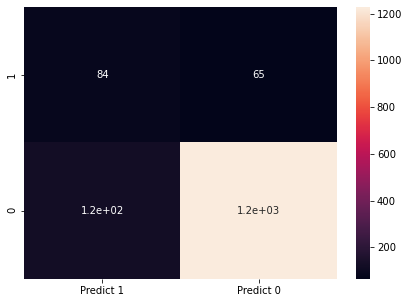

In [110]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, file_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [111]:
print("Classification Report")
print(metrics.classification_report(y_test, file_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



We can see our true positive numbers with value 1 is  of precision and recall is below 70% 

Naive bays is better than the logistic regression
 Deviation also less in logistic regression.